<a href="https://colab.research.google.com/github/nguyenphuoc57/SP-Team/blob/main/VGG19_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras, os
import numpy as np
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import PIL
from io import BytesIO
from IPython.display import display, Image

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

In [ ]:
trdata = ImageDataGenerator(rescale=(1/255))
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/Dataset_Apple_and_Oranges/train/",target_size=(224,224))
tsdata = ImageDataGenerator(1/255)
testdata=tsdata.flow_from_directory(directory='/content/drive/MyDrive/Dataset_Apple_and_Oranges/test',target_size=(224,224))

Found 2014 images belonging to 2 classes.
Found 514 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg19 import VGG19
vggmodel = VGG19(weights='imagenet',include_top=True)

574717952/574710816 [==============================] - 6s 0us/step


In [ ]:
vggmodel.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layers in (vggmodel.layers)[:21]:
  print(layers)
  layers.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
X=vggmodel.layers[-2].output
predictions = Dense(2,activation="softmax")(X)
model_final=Model(inputs= vggmodel.input,outputs= predictions)

In [ ]:
model_final.compile(loss="categorical_crossentropy",
                    optimizer= optimizers.SGD(learning_rate=0.01, momentum=0.9),metrics=["accuracy"])

In [ ]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.callbacks import ModelCheckpoint ,EarlyStopping
checkpoint = ModelCheckpoint("vgg19_1.h5",monitor='val_accuracy',verbose=1, save_best_file_only=True,save_weights_only=False,mode='auto',peroid=1)
early = EarlyStopping(monitor='val_accuracy',min_delta=0,patience=40,verbose=1,mode='auto')
hist = model_final.fit_generator(generator= traindata, steps_per_epoch=8, epochs=15, verbose=1, validation_data= testdata, validation_steps=8)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 5.4283 - accuracy: 0.5049 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


8/8 [==============================] - 293s 34s/step - loss: 5.2293 - accuracy: 0.5065 - val_loss: 0.9509 - val_accuracy: 0.5352
Epoch 2/15
8/8 [==============================] - 168s 22s/step - loss: 0.7005 - accuracy: 0.5513 - val_loss: 0.7692 - val_accuracy: 0.5352
Epoch 3/15
8/8 [==============================] - 122s 16s/step - loss: 0.6945 - accuracy: 0.5094 - val_loss: 0.6806 - val_accuracy: 0.5859
Epoch 4/15
8/8 [==============================] - 90s 12s/step - loss: 0.6933 - accuracy: 0.4963 - val_loss: 0.7608 - val_accuracy: 0.5273
Epoch 5/15
8/8 [==============================] - 71s 9s/step - loss: 0.6932 - accuracy: 0.4794 - val_loss: 0.7427 - val_accuracy: 0.5391
Epoch 6/15
8/8 [==============================] - 68s 9s/step - loss: 0.6934 - accuracy: 0.4527 - val_loss: 0.7231 - val_accuracy: 0.5742
Epoch 7/15
8/8 [==============================] - 56s 7s/step - loss: 0.6930 - accuracy: 0.5002 - val_loss: 0.7393 - val_accuracy: 0.5195
Epoch 8/15
8/8 [======================

In [ ]:
#Save the final weights after training
model_final.save_weights("vgg19_1.h5")

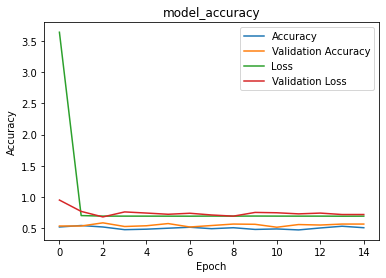

In [ ]:
#To visualise the training/validation accuracy and loss
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model 

#Load the final model for data testing/prediction 
saved_model= model_final.save_weights("vgg19_1.h5")
#saved_model = Load_model("vgg19_1.h5")

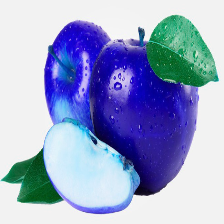

apple


In [ ]:
from io import BytesIO
import PIL
from IPython.display import display, Image 
from keras.preprocessing.image import load_img
from skimage import io
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow
#Display testing data and label below 
def display_img_array(ima):
  im = PIL.Image.fromarray(ima)
  bio=BytesIO()
  im.save(bio, format='png')
  display(Image(bio.getvalue(), format='png'))

urls = "https://vtv1.mediacdn.vn/thumb_w/650/2018/4/4/anh-1-tao-1-15228175859241411126029.jpg"
img_temp = io.imread(urls)
image_2 = cv.cvtColor(img_temp, cv.COLOR_RGB2BGR)
image = cv.resize(image_2,(224,224))
display_img_array(image)
image=np.expand_dims(image,axis=0)
output=model_final.predict(image)
if output[0][0] > output[0][1]:
  print("orange")
else:
  print("apple")

